<a href="https://colab.research.google.com/github/SimranChawla-27/ML-Intern-Task/blob/main/ML_Intern_Simran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('TASK-ML-INTERN.csv')
print(data.head())

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445 

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


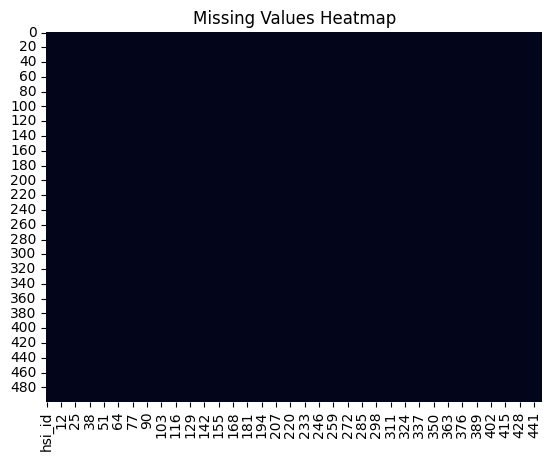

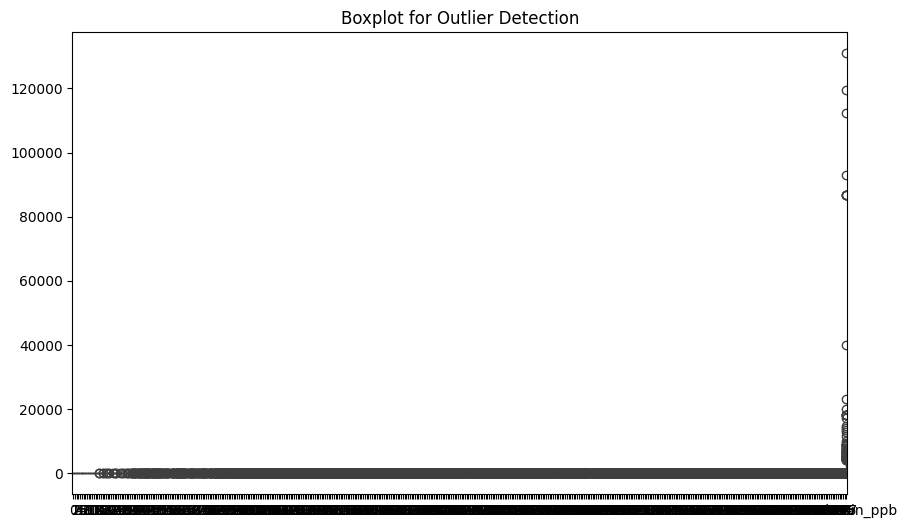

In [2]:
# Check for missing values
print(data.isnull().sum())

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [3]:
# Select only numeric columns for filling NaN
numeric_columns = data.select_dtypes(include=['number'])
numeric_columns.fillna(numeric_columns.mean(), inplace=True)

# Update the original DataFrame with the filled numeric columns
data[numeric_columns.columns] = numeric_columns

# For non-numeric columns, consider filling with a suitable strategy
# like the most frequent value (mode) or a specific placeholder.
# Example using mode:
for col in data.select_dtypes(exclude=['number']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)



<ipython-input-3-35b04b732ec6>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


print(data.columns)  # Print the columns to inspect their names

# Assuming there's a typo or case mismatch, correct the column name:
# For example, if the column is named 'don_concentration', use:
features = data.drop('vomitoxin_ppb', axis=1)
# or if the name is Don_concentration
# features = data.drop('Don_concentration', axis=1)

# If the column is confirmed to exist with the name 'DON_concentration',
# the error might be due to some other issue with your data loading or manipulation.

# Select only numeric features for scaling
numeric_features = features.select_dtypes(include=['number'])

# Apply StandardScaler to numeric features only
features_scaled = scaler.fit_transform(numeric_features)

# If you need to keep the original DataFrame structure,
# you can reassign the scaled numeric features back to the original DataFrame
features[numeric_features.columns] = features_scaled

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)


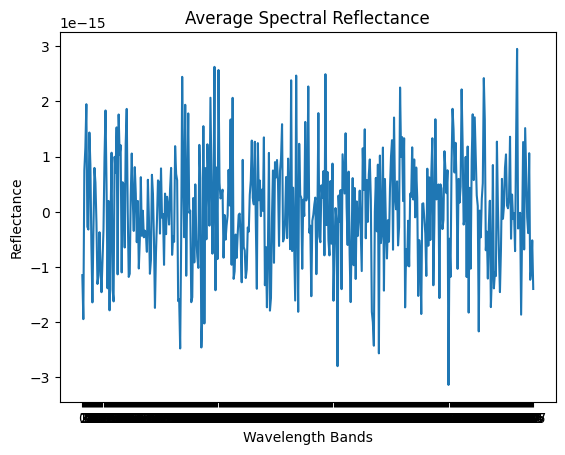

In [5]:
# Average reflectance across samples
# Select only numeric columns for calculating the mean
numeric_features = features.select_dtypes(include=['number'])

average_reflectance = numeric_features.mean()  # Calculate mean for numeric columns only

plt.plot(average_reflectance)
plt.title('Average Spectral Reflectance')
plt.xlabel('Wavelength Bands')
plt.ylabel('Reflectance')
plt.show()

# The rest of your code remains the same...

Explained Variance by Principal Components: [0.87077909 0.05849069]


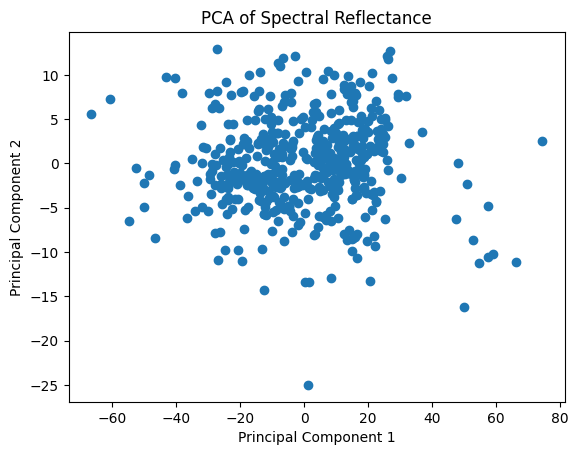

In [6]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by Principal Components: {explained_variance}')

# Visualize PCA results
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA of Spectral Reflectance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

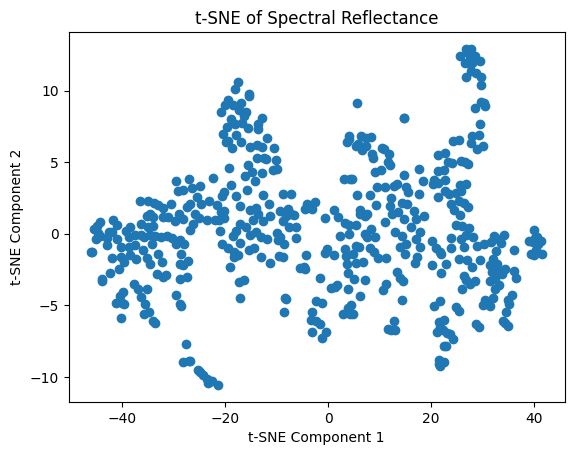

In [7]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_scaled)

# Visualize t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE of Spectral Reflectance')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Define target variable
target = data['vomitoxin_ppb']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf = RandomForestRegressor()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

MAE: 3940.8952499116085, RMSE: 11591.525368820094, R²: 0.519329002084988


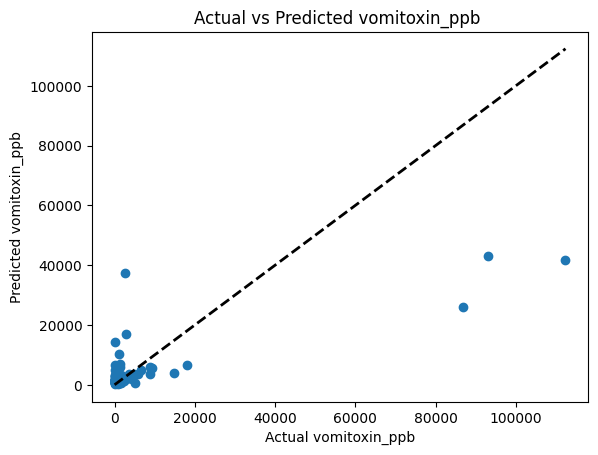

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = best_rf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE without 'squared' argument if using older scikit-learn
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, RMSE: {rmse}, R²: {r2}')

# Visualize actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual vomitoxin_ppb')
plt.ylabel('Predicted vomitoxin_ppb')
plt.title('Actual vs Predicted vomitoxin_ppb ')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()